## Initial data transformation and processing

In [5]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mati/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
data_array = sio.loadmat('data/DATASET.mat')['DATASET']

Original dataset has all variables as imaginary numbers, for most of them the imaginary part is zero. But for FFT variables imaginary part is non-zero.

We'll split variables with imaginary part in real and imaginary as separate variables. Then, all variables will be represented as floats.

In [4]:
# Get only real part
data_float = data_array.copy().real.astype(float)
# Get imaginary part
imaginary_L_FFT = data_array.imag[:, 597:797]
imaginary_R_FFT = data_array.imag[:, 797:997]
# Array with all variables as float (includding imaginary part as a separate variable)
all_float_array = np.hstack((data_float[:, :997], imaginary_L_FFT, imaginary_R_FFT, data_float[:, 997:]))

In [5]:
# Imaginary components are now separated
print 'original dataset shape:', data_array.shape
print 'all floats dataset shape:', all_float_array.shape

original dataset shape: (65600, 1039)
all floats dataset shape: (65600, 1439)


Now we will include feature names:

In [6]:
column_names = []
# Time series
for i in range(200):
    column_names.append('L_HRIR_{:d}'.format(i))
for i in range(200):
    column_names.append('R_HRIR_{:d}'.format(i))
    
# Frequency Series
for i in range(98):
    column_names.append('L_HRTF_{:d}'.format(i))
for i in range(98):
    column_names.append('R_HRTF_{:d}'.format(i))

# Complex Response
for i in range(200):
    column_names.append('L_FFT_real_{:d}'.format(i))
for i in range(200):
    column_names.append('R_HRIR_real_{:d}'.format(i))
for i in range(200):
    column_names.append('L_FFT_imag_{:d}'.format(i))
for i in range(200):
    column_names.append('R_HRIR_imag_{:d}'.format(i))
# Interaction Parameters
# Time-arrival Difference
column_names.append('ITD')
# Intensity Difference
column_names.append('IID')
# Spectral Difference
column_names.append('DS')
# Head Parameters
column_names.append('head_width')
column_names.append('head_height')
column_names.append('head_depth')
column_names.append('pinna_offset_down')
column_names.append('pinna_offset_back')
column_names.append('neck_width')
column_names.append('neck_height')
column_names.append('neck_depth')
column_names.append('torso_top_width')
column_names.append('torso_top_heigth')
column_names.append('torso_top_depth')
column_names.append('shoulder_width')
column_names.append('head_offset_forward')
column_names.append('height')
column_names.append('seated_height')
column_names.append('head_circumference ')
column_names.append('shoulder_circumference')

# Ear Parameters
column_names.append('L_cavum_concha_heigth')
column_names.append('L_cymba_concha_heigth')
column_names.append('L_cavum_concha_width')
column_names.append('L_fossa_height')
column_names.append('L_pinna_height')
column_names.append('L_pinna_width')
column_names.append('L_intertragal_incisure_width')
column_names.append('L_cavum_concha_depth')
column_names.append('R_cavum_concha_heigth')
column_names.append('R_cymba_concha_heigth')
column_names.append('R_cavum_concha_width')
column_names.append('R_fossa_height')
column_names.append('R_pinna_height')
column_names.append('R_pinna_width')
column_names.append('R_intertragaR_incisure_width')
column_names.append('R_cavum_concha_depth')

# Pinnae Rotation Parameters
column_names.append('L_pinna_rotation_angle')
column_names.append('L_pinna_flare_angle')
column_names.append('R_pinna_rotation_angle')
column_names.append('R_pinna_flare_angle')

# Target
column_names.append('azimuth')
column_names.append('elevation')

# Subject Id
column_names.append('subject_id')

In [9]:
# col_ix Dictionary can be used to get the index of any feature
col_ix = {}
for i, col in enumerate(df.columns):
    col_ix[col] = i

In [7]:
# Should match the number of colums in dataset
len(column_names)

1439

In [8]:
# Build Pandas DataFrame
df = pd.DataFrame(all_float_array, columns=column_names)

In [110]:
# Number of unique azimuth, elevation and subject_id values
print 'azimuth: \nunique', df.azimuth.nunique(), '\n', df.azimuth.describe().transpose()
print 'elevation: \n unique', df.elevation.nunique(), df.elevation.describe().transpose()
print 'subject_id:', df.subject_id.nunique()

 azimuth: 
unique 60 
count    65600.000000
mean        -4.321646
std        107.656501
min       -180.000000
25%       -100.000000
50%         -0.000000
75%         80.000000
max        175.000000
Name: azimuth, dtype: float64
elevation: 
 unique 32 count    65600.000000
mean        17.841797
std         40.146042
min        -50.625000
25%        -16.875000
50%         16.875000
75%         50.625000
max         90.000000
Name: elevation, dtype: float64
subject_id: 95


In [3]:
df.elevation.unique()

NameError: name 'df' is not defined

Full dataset contains data from two original datasets.

For the moment we will work with the first dataset only.

In [11]:
ds_1 = df.ix[:56249].copy()
ds_1.shape

(56250, 1439)

In [12]:
# TOTAL Unique Subjects for dataset 1 = 45
ds_1.loc[:, ('subject_id')] = ds_1['subject_id'].astype(int)
ds_1.subject_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

## Inter-subject variation for same azimuth and elevation angles

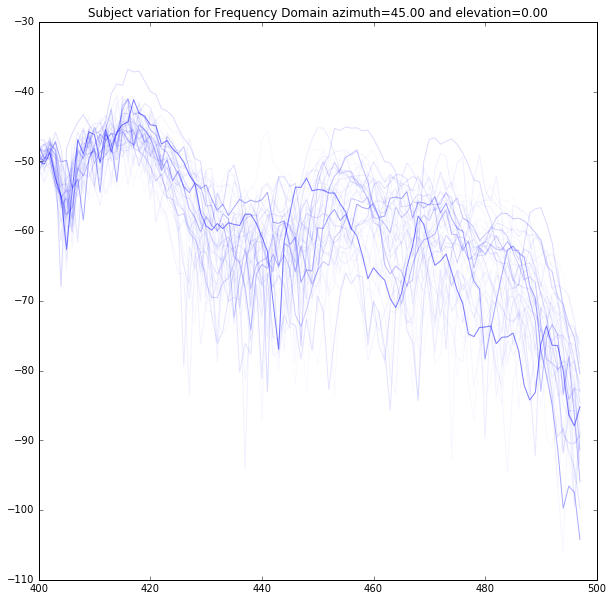

In [13]:
plt.figure(figsize=(10, 10))
#azimuth = np.random.randint(-180, 175)
#elevation = np.random.randint(-50, 90)
azimuth, elevation = 45.0, 0.0 
location = ds_1[(ds_1.azimuth == azimuth) & (ds_1.elevation == elevation)]
location2 = ds_1[(ds_1.azimuth == 0.0) & (ds_1.elevation == 0.0)]
location3 = ds_1[(ds_1.azimuth == -45.0) & (ds_1.elevation == elevation)]
range_ = range(400, 498)
l_hrtf = location.iloc[:,range_]
r_hrtf = location.iloc[:, range_]
j = 1
for i in range(1, 45):
    first = l_hrtf[location.subject_id == i].iloc[0]
    plt.plot(range_, first, c='b', alpha=1.0/(j+1))
    #plt.plot(range(98), r_hrir.iloc[i], c='r', alpha=1.0/(j+1))
    j += 1
#plt.legend(loc='upper right')
plt.title('Subject variation for Frequency Domain azimuth={:.2f} and elevation={:.2f}'.format(azimuth, elevation))
plt.show()

In [15]:
# Analayzing non-HRTF features (extracted features)
# Some of them seem to be missing
ds_1.ix[:, 1399:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
head_width,46250.0,14.428826,0.905161,12.646597,13.903307,14.443268,14.892092,16.203902
head_height,46250.0,21.377795,1.161957,18.865526,20.665188,21.311794,22.090244,23.842658
head_depth,46250.0,19.900724,1.312059,16.660570,19.275830,19.915320,20.870571,23.064239
pinna_offset_down,46250.0,3.006494,0.586056,1.408322,2.446867,3.220209,3.469709,3.772236
pinna_offset_back,46250.0,0.389666,0.590552,-1.170696,0.167971,0.393765,0.785692,1.899457
neck_width,46250.0,11.518612,0.997720,9.408768,11.020129,11.549176,12.212968,14.042607
neck_height,46250.0,6.177656,1.972471,1.905978,4.982187,6.340924,7.461400,10.600237
neck_depth,46250.0,10.477648,1.134602,7.837414,9.936521,10.372081,11.325472,12.534256
torso_top_width,46250.0,30.953683,2.606181,25.202642,29.566625,31.213773,32.422859,36.839476
torso_top_heigth,46250.0,13.429684,1.939632,9.412423,12.236193,13.005980,14.494436,17.560892


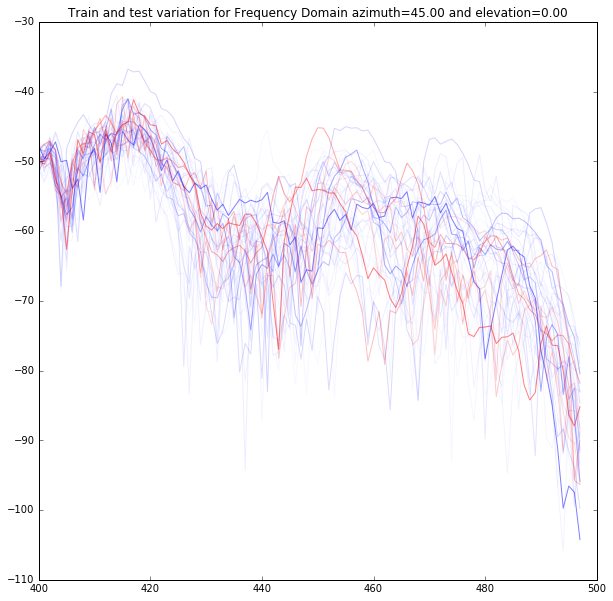

In [81]:
plt.figure(figsize=(10, 10))
#azimuth = np.random.randint(-180, 175)
#elevation = np.random.randint(-50, 90)
azimuth, elevation = 45.0, 0.0
range_ = range(400, 498)
train_location = train[((train.azimuth == azimuth) & (train.elevation == elevation))]
test_location = test[((test.azimuth == azimuth) & (test.elevation == elevation))]
l_hrtf = train_location.ix[:, range_]
l_hrtf_test = test_location.ix[:, range_]
j = 1
for i in train.subject_id.unique():
    subj_train = l_hrtf[train_location.subject_id == i].iloc[0]
    plt.plot(range_, subj_train, c='b', alpha=1.0/(j+1))
    j += 1
j = 1
for i in test.subject_id.unique():
    subj_test = l_hrtf_test[test_location.subject_id == i].iloc[0]
    plt.plot(range_, subj_test, c='r', alpha=1.0/(j+1))
    j += 1
plt.title('Train and test variation for Frequency Domain azimuth={:.2f} and elevation={:.2f}'.format(azimuth, elevation))
plt.show()

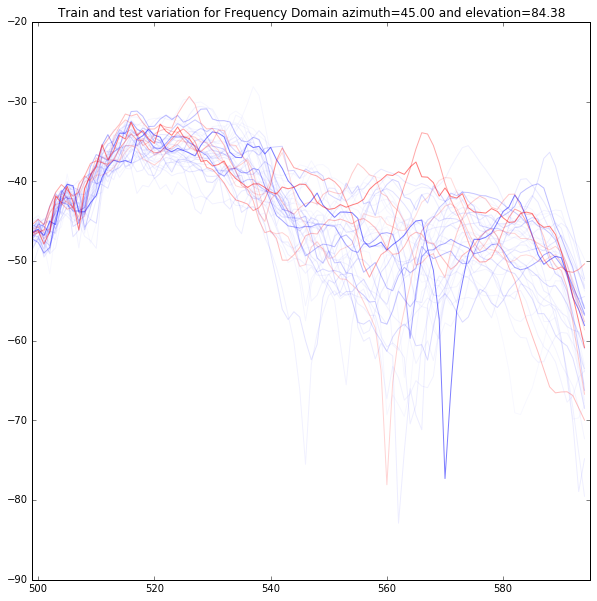

In [87]:
plt.figure(figsize=(10, 10))
#azimuth = np.random.randint(-180, 175)
#elevation = np.random.randint(-50, 90)
azimuth, elevation = 45.0, 84.375
range_ = range(499, 595)
train_location = train[((train.azimuth == azimuth) & (train.elevation == elevation))]
test_location = test[((test.azimuth == azimuth) & (test.elevation == elevation))]
l_hrtf = train_location.ix[:, range_]
l_hrtf_test = test_location.ix[:, range_]
j = 1
for i in train.subject_id.unique():
    subj_train = l_hrtf[train_location.subject_id == i].iloc[0]
    plt.plot(range_, subj_train, c='b', alpha=1.0/(j+1))
    j += 1
j = 1
for i in test.subject_id.unique():
    subj_test = l_hrtf_test[test_location.subject_id == i].iloc[0]
    plt.plot(range_, subj_test, c='r', alpha=1.0/(j+1))
    j += 1
plt.xlim(499, 595)
plt.title('Train and test variation for Frequency Domain azimuth={:.2f} and elevation={:.2f}'.format(azimuth, elevation))
plt.show()

Frequency series for subjects in Training and Test Sets

## Baseline Regression Tree model
### Dataset split
- training: 75%
- validation: 10%
- test: 15%

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error
from math import ceil

In [17]:
def split_dataset(n, training_perc=0.75, val_perc=0.1):
    train_size = int(ceil(n*training_perc))
    val_size = int(ceil(n*val_perc))
    shuffled_ix = np.random.choice(range(1, n+1), n, replace=False)
    return shuffled_ix[:train_size], shuffled_ix[train_size:train_size + val_size], shuffled_ix[train_size + val_size:]

In [18]:
# Fit regression model
# Only use this columns for the moment
cols_range = range(0, 1399) + range(-3, 0, 1)
ds_1 = ds_1.ix[:, cols_range]
n = 45

In [19]:
#train_ix, val_ix, test_ix = split_dataset(n)
#train_ix.sort()
#val_ix.sort()
#test_ix.sort()
#print 'chosen training subjects:', train_ix
#print 'chosen validation subjects:', val_ix
#print 'chosen test subjects:', test_ix

From now on, chosen users will be used for each dataset (trainig, validation and testing)

In [159]:
def get_splitted_dataset(ds):
    train_ix = [2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 22, 23,
                25, 26, 27, 28, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44]
    val_ix = [7, 24, 29, 30, 38]
    test_ix = [1, 12, 20, 21, 32, 45]

    train = ds[ds.subject_id.isin(train_ix)]
    val = ds[ds.subject_id.isin(val_ix)]
    test = ds[ds.subject_id.isin(test_ix)]
    return train, val, test

### Building baseline model for Elevation

In [119]:
X_train, y_train = train.ix[:, :-3], train.ix[:, 'elevation']
X_test, y_test = test.ix[:, :-3], test.ix[:, 'elevation']

In [113]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(42500, 1399) (42500, 1)
(7500, 1399) (7500, 1)


In [137]:
# Regression Tree Baseline Model
# command: dot -Tpng tree4.dot -o tree4.png
depth = 15
regr = DecisionTreeRegressor(max_depth=depth)
regr.fit(X_train, y_train)
with open('tree' + str(depth) + '.dot', 'w') as dotfile:
    export_graphviz(
        regr,
        dotfile,
        feature_names=X_train.columns)

# Predict
y_pred = regr.predict(X_test)
loss = mean_absolute_error(y_test, y_pred)

print loss

15.8549381381


In [124]:
# Number of possible outcomes in built tree, comparte to 32 unique values of elevation
pd.Series(y_pred).nunique()

606

In [25]:
# Build dataframe to compare real values with predictions on test set
new_df = pd.concat([y_test, pd.Series(y_pred, index=y_test.index), test.ix[:, -3:]], axis=1)
new_df.to_csv('results.csv')

In [135]:
# Classification Tree Baseline Model
# command: dot -Tpng tree4.dot -o tree4.png
depth=15
c_tree = DecisionTreeClassifier(max_depth=depth)
c_tree.fit(X_train, y_train.astype(np.str))

with open('class_tree' + str(depth) + '.dot', 'w') as dotfile:
    export_graphviz(
        regr,
        dotfile,
        feature_names=X_train.columns)

# Predict
y_pred = c_tree.predict(X_test).astype(np.float64)
loss = mean_absolute_error(y_test, y_pred)

print loss

16.31175


In [136]:
# Build dataframe to compare real values with predictions on test set
new_df = pd.concat([y_test, pd.Series(y_pred, index=y_test.index), test.ix[:, -3:]], axis=1)
new_df.to_csv('results_class.csv')

In [138]:
from sklearn.neighbors import KNeighborsRegressor

In [139]:
knn_regr = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_regr.fit(X_train, y_train)
# Predict
y_pred = knn_regr.predict(X_test)
loss = mean_absolute_error(y_test, y_pred)

print loss

19.1014454668


## Include all features

In [158]:
# Include all features
ds_2 = df.ix[:56249].copy()
n = 45

# Substitute missing values with feature mean
means = ds_2.mean(axis=0)
ds_2 = ds_2.fillna(means)

In [160]:
train, val, test = get_splitted_dataset(ds_2)

In [162]:
# Write .csv for each set
train.to_csv('data/train.csv')
val.to_csv('data/val.csv')
test.to_csv('data/test.csv')

In [163]:
print train.shape, val.shape, test.shape

(42500, 1439) (6250, 1439) (7500, 1439)
